In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

import pprint
from pprint import pprint
import joblib

In [5]:
df = pd.read_csv('../input/creditcard.csv')
df = df.rename(columns={'Class': 'Fraud'})

print(df.columns)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud'],
      dtype='object')


In [6]:
fraud = df.loc[df['Fraud'] == 1]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Determine number of fraud cases in dataset
fraud = df[df['Fraud'] == 1]
valid = df[df['Fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Fraud'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Fraud'] == 0])))


print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315
Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print("Skewness: %f" %df['Amount'].skew())
print("Kurtosis: %f" %df['Amount'].kurt())

Skewness: 16.977724
Kurtosis: 845.092646


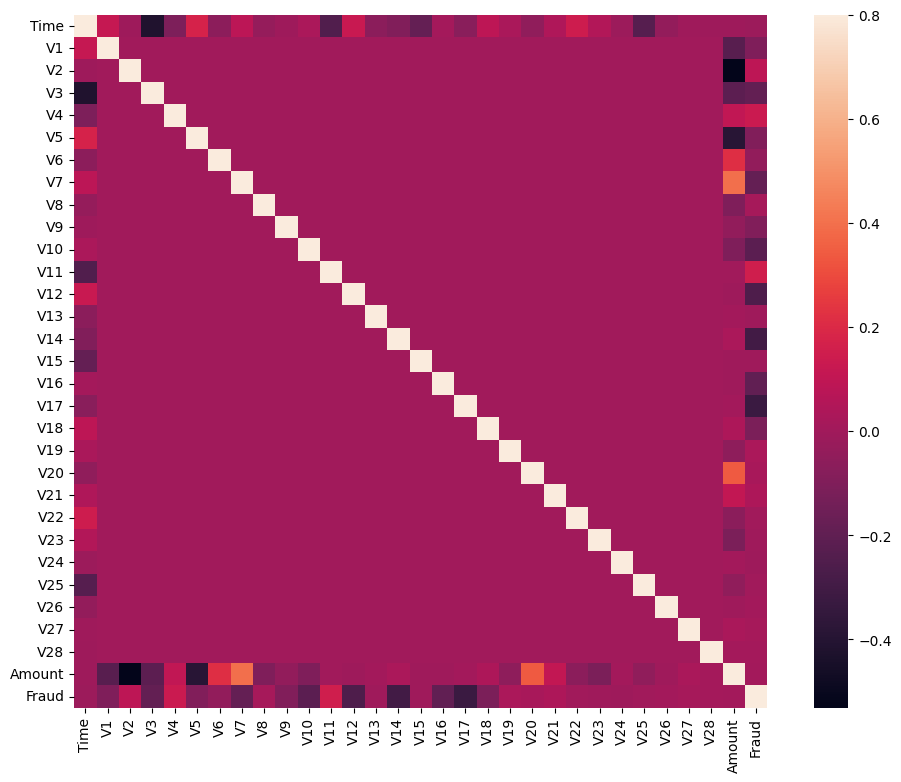

In [10]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

<AxesSubplot: xlabel='Amount', ylabel='Fraud'>

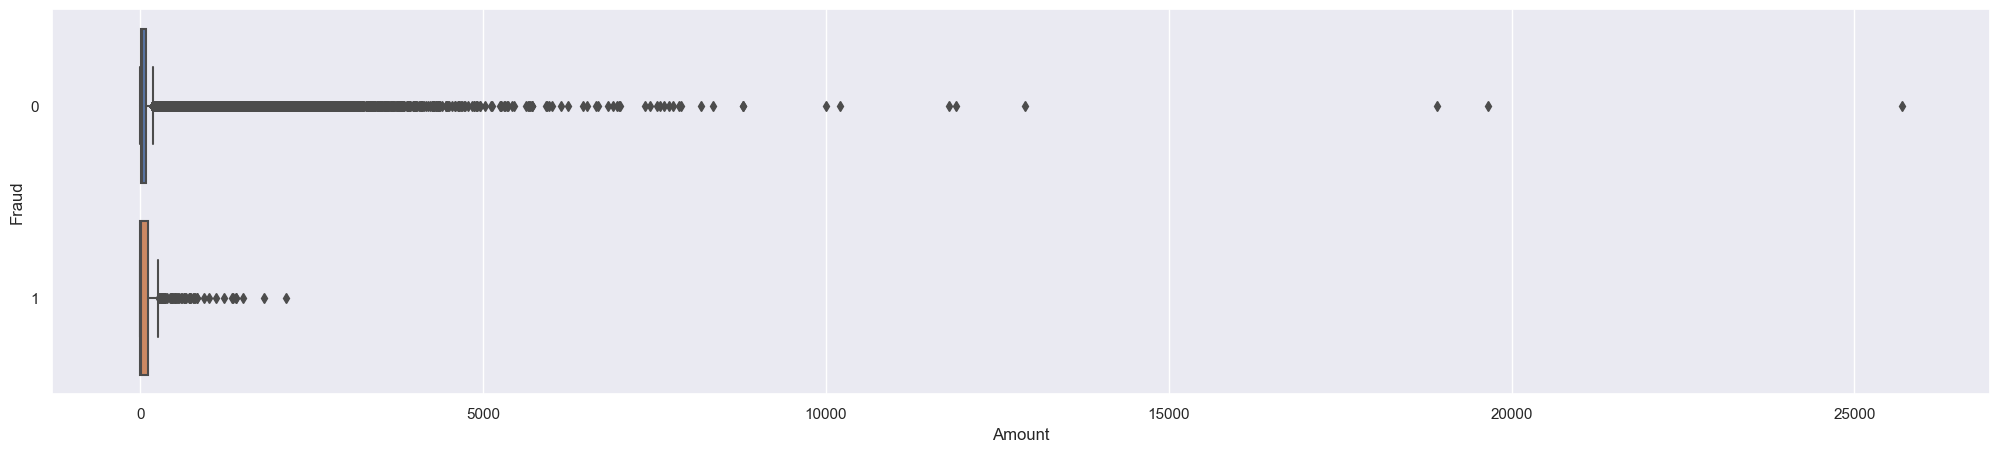

In [9]:
sns.set(rc={'figure.figsize':(25,5)})
df['Fraud'] = df['Fraud'].astype(str)
sns.boxplot(data = df, x = "Amount", y = "Fraud", showfliers = True)
#sns.boxplot(data = fraud, x = "Amount", showfliers = False)

#sns.boxplot(fraud["Amount"], x = "Amount", showfliers = False)

#sns.boxplot(data=df[["Amount"]], x="Amount", hue="Class")

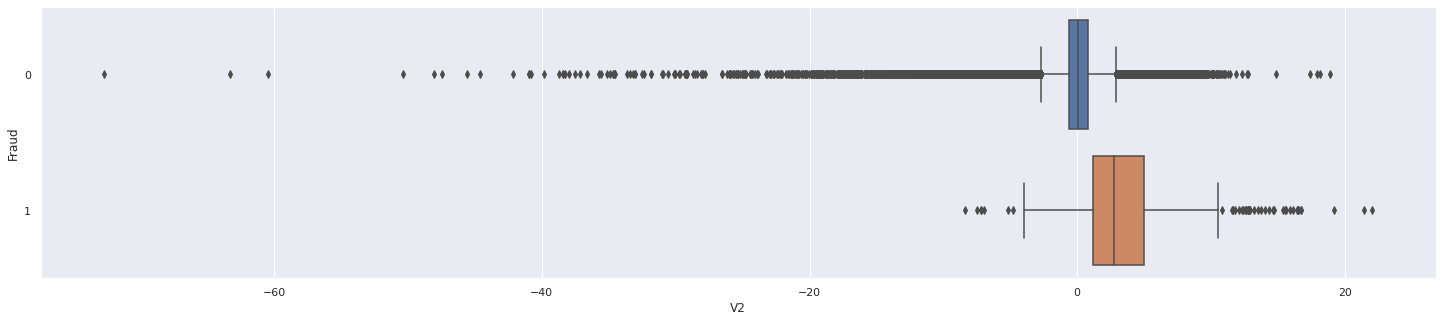

In [10]:
sns.boxplot(data = df, x = "V2", y = "Fraud", showfliers = True)

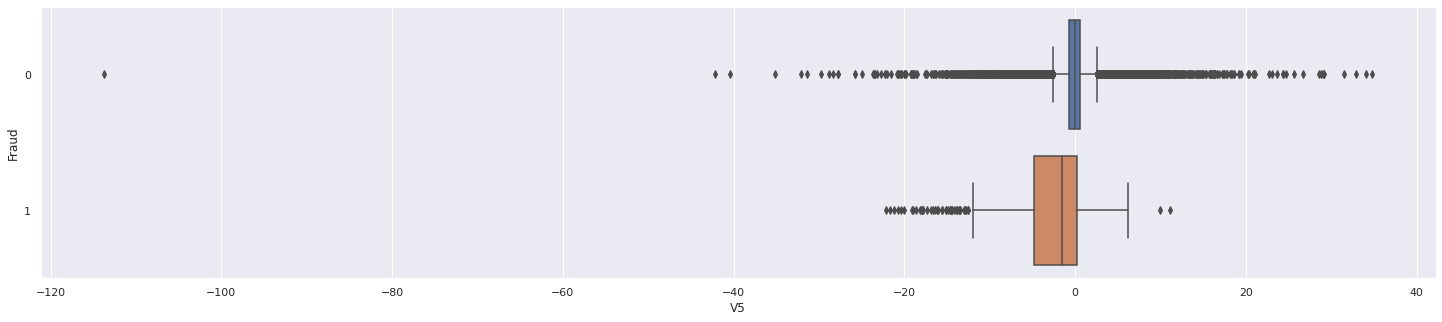

In [11]:
sns.boxplot(data = df, x = "V5", y = "Fraud", showfliers = True)

In [15]:
from sklearn.preprocessing import StandardScaler



<AxesSubplot: xlabel='V5', ylabel='Fraud'>

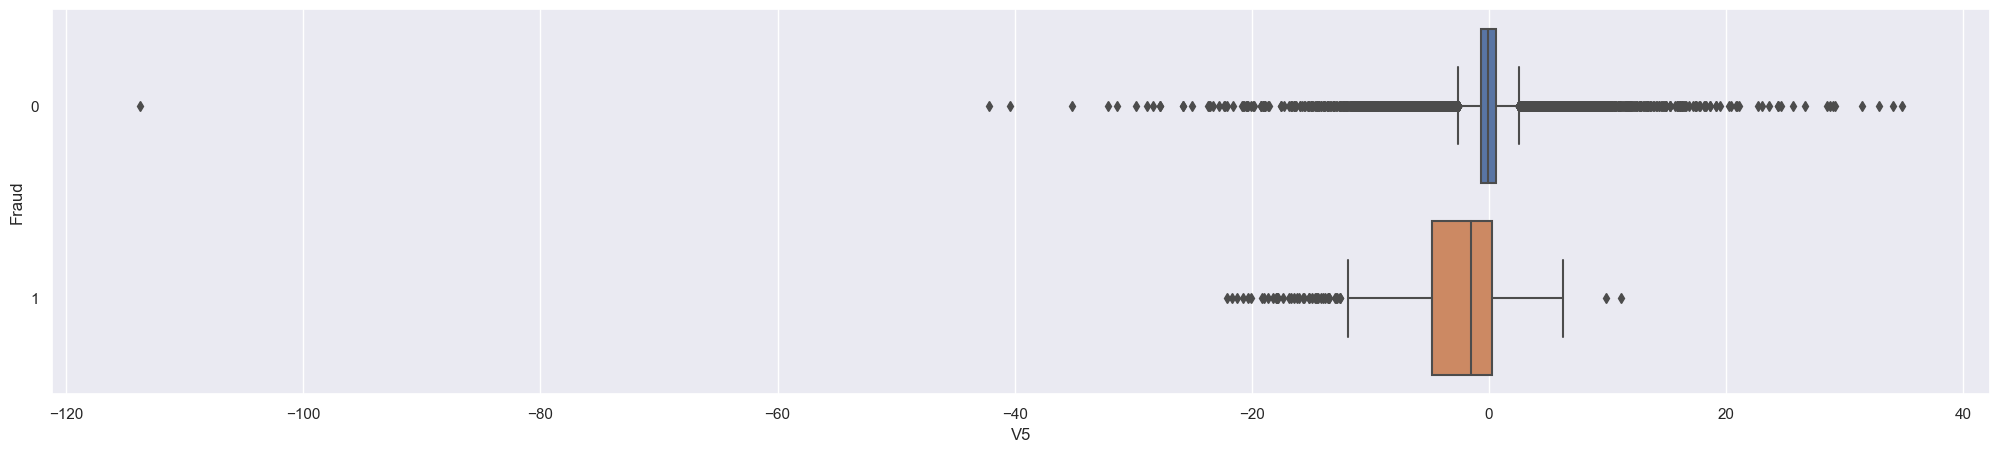

In [11]:
sns.boxplot(data = df, x = "V5", y = "Fraud", showfliers = True)


In [11]:
df['Fraud'] = df['Fraud'].astype(int)

X = df.drop(['Fraud'], axis = 1)
Y = df["Fraud"]

xData = X.values
yData = Y.values

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

pipe = Pipeline([('standardScaler', StandardScaler()), ('quantiletransformer', QuantileTransformer()), ('logisticRegression', LogisticRegression())])


In [17]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = (cross_val_score(pipe, xTrain, yTrain, cv=cv))

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid_pspp = [{
    'logisticRegression__C': [1.0, 2.0, 4.0]
}]

grid_search_pspp = GridSearchCV(pipe, param_grid_pspp, cv=5,
                                scoring= 'accuracy', verbose=2, n_jobs=-1)
grid_search_pspp.fit(xTrain, yTrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..........................logisticRegression__C=1.0; total time=   2.7s
[CV] END ..........................logisticRegression__C=1.0; total time=   2.6s
[CV] END ..........................logisticRegression__C=1.0; total time=   2.6s
[CV] END ..........................logisticRegression__C=1.0; total time=   2.7s
[CV] END ..........................logisticRegression__C=2.0; total time=   2.7s
[CV] END ..........................logisticRegression__C=2.0; total time=   2.9s
[CV] END ..........................logisticRegression__C=2.0; total time=   2.8s
[CV] END ..........................logisticRegression__C=1.0; total time=   2.8s
[CV] END ..........................logisticRegression__C=2.0; total time=   2.3s
[CV] END ..........................logisticRegression__C=2.0; total time=   2.4s
[CV] END ..........................logisticRegression__C=4.0; total time=   2.3s
[CV] END ..........................logisticRegres

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScaler', StandardScaler()),
                                       ('quantiletransformer',
                                        QuantileTransformer()),
                                       ('logisticRegression',
                                        LogisticRegression())]),
             n_jobs=-1, param_grid=[{'logisticRegression__C': [1.0, 2.0, 4.0]}],
             scoring='accuracy', verbose=2)

In [20]:
dir(grid_search_pspp)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_fe

In [21]:
grid_search_pspp.cv_results_

{'mean_fit_time': array([2.40635252, 2.31585956, 2.14728765]),
 'std_fit_time': array([0.07553079, 0.21846025, 0.08097608]),
 'mean_score_time': array([0.29187202, 0.29516091, 0.20937209]),
 'std_score_time': array([0.01646284, 0.00732209, 0.03486385]),
 'param_logisticRegression__C': masked_array(data=[1.0, 2.0, 4.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'logisticRegression__C': 1.0},
  {'logisticRegression__C': 2.0},
  {'logisticRegression__C': 4.0}],
 'split0_test_score': array([0.99940749, 0.99940749, 0.99940749]),
 'split1_test_score': array([0.99931971, 0.99931971, 0.99931971]),
 'split2_test_score': array([0.99934166, 0.99934166, 0.99934166]),
 'split3_test_score': array([0.9993636 , 0.99938555, 0.9993636 ]),
 'split4_test_score': array([0.99934166, 0.99934166, 0.99934166]),
 'mean_test_score': array([0.99935482, 0.99935921, 0.99935482]),
 'std_test_score': array([2.97672979e-05, 3.22520539e-05, 2.97672979e-05

In [19]:
pprint(grid_search_pspp.best_estimator_)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('logisticRegression', LogisticRegression(C=2.0))])


In [22]:
#data for pipe
print("%0.9f accuracy with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999382626 accuracy with a standard deviation of 0.000051848


In [18]:
#data for pipe1 was too lazy to do the cross validation again
print("%0.9f accuracy with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999385552 accuracy with a standard deviation of 0.000056282


In [23]:
grid_search_pspp.best_estimator_[:2]

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('quantiletransformer', QuantileTransformer())])

In [26]:
joblib.dump(grid_search_pspp.best_estimator_[:2],'filename.pkl')

['filename.pkl']

In [27]:
dir(grid_search_pspp.best_estimator_)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_params',
 '_validate_steps',
 